In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

# Linear Regression

In [3]:
# Generate some data with noise
t1_samp = 4
t2_samp = 6
x = np.linspace(-2, 4, 100)
np.random.seed(10242)
y = t1_samp*x + t2_samp + 3*np.random.normal(size=x.size)

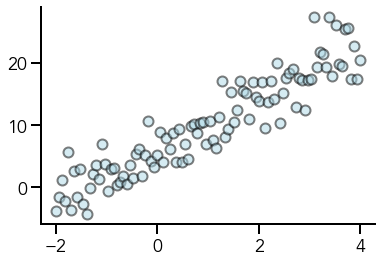

In [4]:
# Plot original data
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.scatter(x, y, s=100, facecolor='#add8e6', edgecolor='black', linewidth=2, alpha=0.5)

plt.show()

# Define cost function

## In two-dimensions:
### $J(\theta_0, \theta_1) = \frac{1}{2m}\sum\limits_{i = 1}^{m}(\theta_0 + \theta_1x_1 - y_1)^2$

### $J(\theta_0 \ldots \theta_m) = \frac{1}{2m}\sum\limits_{i = 1}^{m}(\theta_i x_i - y_i)^2$

In [5]:
def cost_function(X, y, theta):
    """
    Computes the cost function of the linear regression
    
    Parameters
        X (np.array): matrix of x values (n x 2)
        y (np.array): matrix of y values (n x 1)
        theta (np.array): matrix of theta values (2 x 1)
    
    Returns
        (float): cost of 
    """
    
    m = len(y)
    return (1/(2*m))*sum((np.dot(X, theta) - y)**2)[0]

# Initialize variables for gradient descent
### $X = \begin{bmatrix} x_0^0 & \cdots & x_0^n \\ \vdots & \ddots & \vdots \\ x_m^0 & \cdots & x_m^n \end{bmatrix}$ ($x_i^j$ is the $j^{th}$ feature of the $i^{th}$ training example)
### $y = \begin{bmatrix} y_0 \\ \vdots \\ y_m \end{bmatrix}$
### $\theta = \begin{bmatrix} \theta_0 \\ \vdots \\ \theta_m \end{bmatrix}$

In [6]:
# Initialize variables
X = np.concatenate((np.ones(shape=(len(x), 1)), x.reshape(len(x), 1)), axis=1)
y = y.reshape(len(x), 1)
theta = np.zeros(shape=(2, 1))

In [7]:
# Calculate initial cost
initial_cost = cost_function(X, y, theta)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 82.63


In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Uses gradient descent to minimize cost function
    
    Parameters
    """
    new_theta = np.copy(theta)
    theta_hist = np.copy(theta)
    m = len(y)
    J = np.zeros(num_iters)
    
    for i in range(num_iters):
        new_theta = new_theta - (alpha/m)*(np.dot((np.dot(X, new_theta) - y).T, X)).T
        theta_hist = np.concatenate((theta_hist, new_theta), axis=1)
        J[i] = cost_function(X, y, new_theta)
    return J, new_theta, theta_hist

# Use gradient descent to calculate $\theta_i$

In [9]:
J, new_theta, theta_hist = gradient_descent(X, y, theta, 0.1, 100)

# Show values calculated from gradient descent

In [10]:
print('Calculated values:\n' +
      'b = %.2f' % new_theta[0] +
      '\nm = %.2f' % new_theta[1])

Calculated values:
b = 6.01
m = 4.16


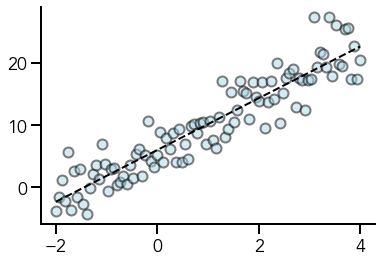

In [11]:
# Plot data with fit
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.scatter(x, y, s=100, facecolor='#add8e6', edgecolor='black', linewidth=2, alpha=0.5)
ax.plot(x, new_theta[1]*x + new_theta[0], color='black', linestyle='--', linewidth=2)

plt.show()

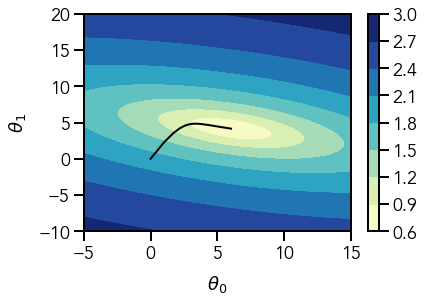

In [12]:
# Plot cost contours
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

t_0, t_1 = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-10, 20, 100))

cost = np.zeros(shape=(len(t_0), len(t_1)))

for i in range(len(t_0)):
    for j in range(len(t_1)):
        cost[i][j] = cost_function(X, y, np.array([[t_0[i][j]], [t_1[i][j]]]))
        
contour_plot = ax.contourf(t_0, t_1, np.log10(cost), cmap='YlGnBu')
ax.plot(theta_hist[0], theta_hist[1], color='black', linewidth=2)
cbar = plt.colorbar(mappable=contour_plot)

ax.set_xlabel(r'$\theta_0$', labelpad=10)
ax.set_ylabel(r'$\theta_1$', labelpad=10)

plt.show()

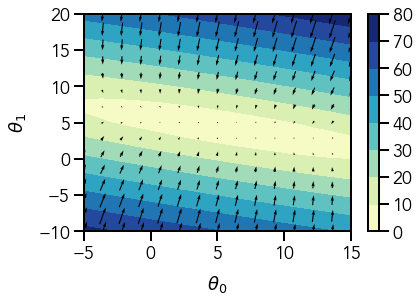

In [13]:
# Plot cost contours
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

t_0, t_1 = np.meshgrid(np.linspace(-5, 15, 15), np.linspace(-10, 20, 15))

gradient_x = np.zeros(shape=(len(t_0), len(t_1)))
gradient_y = np.zeros(shape=(len(t_0), len(t_1)))

for i in range(len(t_0)):
    for j in range(len(t_1)):
        curr_theta = np.array([[t_0[i][j]], [t_1[i][j]]])
        gradient = (-1/len(y))*(np.dot((np.dot(X, curr_theta) - y).T, X)).T
        gradient_x[i][j] = gradient[0]
        gradient_y[i][j] = gradient[1]

mag = np.sqrt(np.power(gradient_x, 2) + np.power(gradient_y, 2))
color = mpl.cm.YlGnBu

contour_plot = ax.contourf(t_0, t_1, mag, cmap='YlGnBu')
quiver_plot = ax.quiver(t_0, t_1, gradient_x, gradient_y, color='black', pivot='mid')
cbar = plt.colorbar(mappable=contour_plot)

ax.set_xlabel(r'$\theta_0$', labelpad=10)
ax.set_ylabel(r'$\theta_1$', labelpad=10)

plt.show()

In [14]:
# Generate dataset
# t2_samp = 5
# t1_samp = 2
# t0_samp = 8
# x_1 = np.linspace(-5, 5, 100)
# x_2 = np.linspace(-3, 8, 100)
# np.random.seed(10504)
# y = t2_samp*x_2 + t1_samp*x_1 + t0_samp + np.random.normal(size=x_1.size)
x_1, x_2, y = np.loadtxt('./ex1data2.txt', delimiter=',', unpack=True)

OSError: ./ex1data2.txt not found.

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_1, x_2, y, s=10)
ax.view_init(elev=15)
ax.dist = 12
plt.tight_layout()
plt.show()

NameError: name 'x_1' is not defined

In [16]:
# Initialize variables
x_1 = (x_1 - np.mean(x_1))/(np.amax(x_1) - np.amin(x_1))
x_2 = (x_2 - np.mean(x_2))/(np.amax(x_2) - np.amin(x_2))
X = np.concatenate((np.ones(shape=(len(x_1), 1)), x_1.reshape(len(x_1), 1), x_2.reshape(len(x_2), 1)), axis=1)
y = y.reshape(len(x_1), 1)
theta = np.zeros(shape=(3, 1))
print(X[0:10])
print(y[0:10])

NameError: name 'x_1' is not defined

In [17]:
# Calculate initial cost
initial_cost = cost_function(X, y, theta)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 82.63


In [18]:
J, new_theta, theta_hist = gradient_descent(X, y, theta, 0.01, 500)
print('Calculated values:\n' + 't_0 = %.2f' % new_theta[0] + '\nt_1 = %.2f' % new_theta[1] + '\nt_2 = %.2f' % new_theta[2])

IndexError: index 2 is out of bounds for axis 0 with size 2

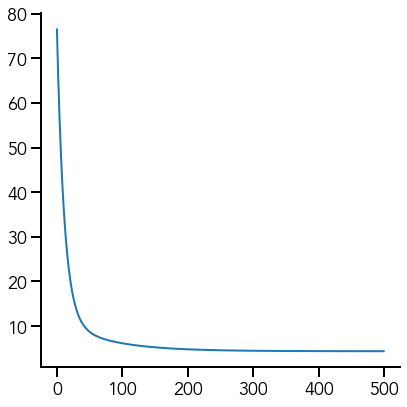

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.plot(range(len(J)), J, linewidth=2)
plt.tight_layout()
plt.show()